In [2]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='whitegrid')

# Reset individual options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

# Set desired options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_colwidth', 200)


In [4]:
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix


In [5]:


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant


In [6]:

import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

In [7]:
train = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv',header=None)
validation = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv',header=None)

In [8]:
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
1,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
2,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
3,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
4,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"


In [9]:
validation.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma..."
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking, it's a truly awful game."
4,4433,Google,Neutral,Now the President is slapping Americans in the face that he really did commit an unlawful act after his acquittal! From Discover on Google vanityfair.com/news/2020/02/t…


In [10]:

train.columns=['Tweet ID','Entity','Sentiment','Tweet Content']

train.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
1,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
2,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
3,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
4,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"


In [11]:

validation.columns=['Tweet ID','Entity','Sentiment','Tweet Content']

validation.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma..."
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking, it's a truly awful game."
4,4433,Google,Neutral,Now the President is slapping Americans in the face that he really did commit an unlawful act after his acquittal! From Discover on Google vanityfair.com/news/2020/02/t…


In [12]:
train.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [13]:
validation.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [14]:
train.dropna(subset=['Tweet Content'], inplace=True)


In [15]:
duplicates = train[train.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
train = train.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')




In [16]:
duplicates = validation[validation.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
validation = validation.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70958 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       70958 non-null  int64 
 1   Entity         70958 non-null  object
 2   Sentiment      70958 non-null  object
 3   Tweet Content  70958 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [18]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet Content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


In [19]:
train.Sentiment.value_counts()

Negative      21565
Positive      19549
Neutral       17398
Irrelevant    12446
Name: Sentiment, dtype: int64

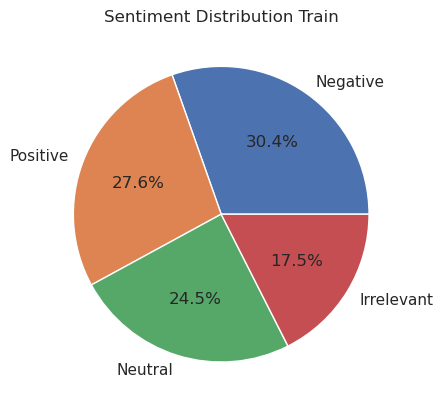

In [20]:

# Calculate the value counts of the 'Sentiment' column
sentiment_counts = train['Sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Sentiment Distribution Train')

# Display the chart;
plt.show()


In [21]:
validation.Sentiment.value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Sentiment, dtype: int64

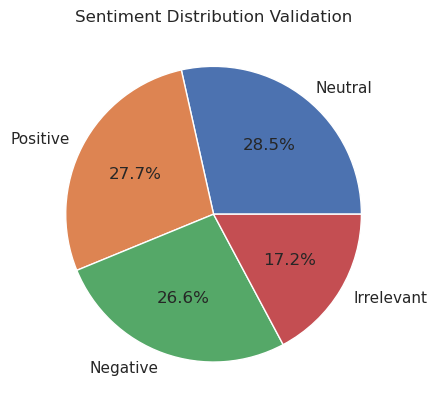

In [22]:

# Calculate the value counts of the 'Sentiment' column
sentiment_counts = validation['Sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Sentiment Distribution Validation')

# Display the chart
plt.show()


CallOfDuty                    2304
Verizon                       2301
MaddenNFL                     2294
NBA2K                         2290
TomClancysRainbowSix          2287
Facebook                      2280
Microsoft                     2278
TomClancysGhostRecon          2263
WorldOfCraft                  2248
johnson&johnson               2247
ApexLegends                   2246
Battlefield                   2236
CallOfDutyBlackopsColdWar     2233
LeagueOfLegends               2228
FIFA                          2224
Dota2                         2218
Amazon                        2213
Overwatch                     2208
Hearthstone                   2201
Other                        28159
Name: Entity, dtype: int64


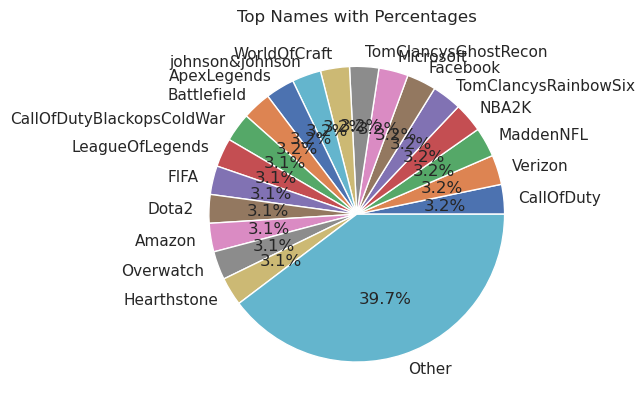

In [23]:

# Calculate the value counts of 'Entity'
entity_counts = train['Entity'].value_counts()

# Get the top 9 names
top_names = entity_counts.head(19)

# Aggregate the tenth name as 'Other'
other_count = entity_counts[19:].sum()
top_names['Other'] = other_count

# Display the top 19 names and 'Other'
print(top_names)


# Calculate the percentages
percentages = (top_names / top_names.sum()) * 100

# Plot the pie chart
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')

# Add a title
plt.title('Top Names with Percentages')

# Display the chart
plt.show()

RedDeadRedemption(RDR)                40
johnson&johnson                       39
FIFA                                  38
PlayerUnknownsBattlegrounds(PUBG)     38
LeagueOfLegends                       37
ApexLegends                           36
TomClancysRainbowSix                  35
Nvidia                                35
GrandTheftAuto(GTA)                   35
Amazon                                34
Fortnite                              34
Facebook                              33
PlayStation5(PS5)                     33
AssassinsCreed                        33
Borderlands                           33
Overwatch                             32
Hearthstone                           32
Verizon                               32
CS-GO                                 32
Other                                339
Name: Entity, dtype: int64


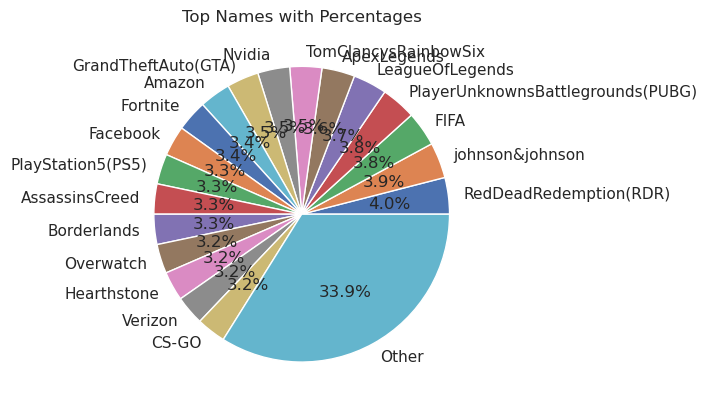

In [24]:

# Calculate the value counts of 'Entity'
entity_counts = validation['Entity'].value_counts()

# Get the top 9 names
top_names = entity_counts.head(19)

# Aggregate the tenth name as 'Other'
other_count = entity_counts[19:].sum()
top_names['Other'] = other_count

# Display the top 19 names and 'Other'
print(top_names)


# Calculate the percentages
percentages = (top_names / top_names.sum()) * 100

# Plot the pie chart
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')

# Add a title
plt.title('Top Names with Percentages')

# Display the chart
plt.show()

In [25]:


# Assuming 'train' is your DataFrame with 'Entity' and 'Sentiment' columns

# Group by 'Entity' and 'Sentiment' and calculate the count
grouped_counts = validation.groupby(['Entity', 'Sentiment']).size().reset_index(name='Count')

# Calculate the total count for each entity
entity_total_counts = grouped_counts.groupby('Entity')['Count'].transform('sum')

# Calculate the percentage for each group
grouped_counts['Percentage'] = (grouped_counts['Count'] / entity_total_counts) * 100

# Sort the grouped counts by count in descending order
grouped_counts = grouped_counts.sort_values('Count', ascending=False)

# Display the sorted grouped counts with percentages
print(grouped_counts)


                                Entity   Sentiment  Count  Percentage
11                      AssassinsCreed    Positive     24   72.727273
124                    johnson&johnson     Neutral     19   48.717949
73                           MaddenNFL    Negative     18   62.068966
101             RedDeadRedemption(RDR)     Neutral     18   45.000000
2                               Amazon     Neutral     18   52.941176
80                               NBA2K    Negative     17   80.952381
6                          ApexLegends     Neutral     17   47.222222
35                       Cyberpunk2077    Positive     17   56.666667
41                                FIFA    Negative     16   42.105263
95   PlayerUnknownsBattlegrounds(PUBG)  Irrelevant     15   39.473684
94                   PlayStation5(PS5)    Positive     15   45.454545
116                       WorldOfCraft     Neutral     15   50.000000
102             RedDeadRedemption(RDR)    Positive     15   37.500000
48                  

In [26]:
train['Sentiment']=train['Sentiment'].astype('string')

Text(0.5, 0.98, 'Histogram number of words in reviews')

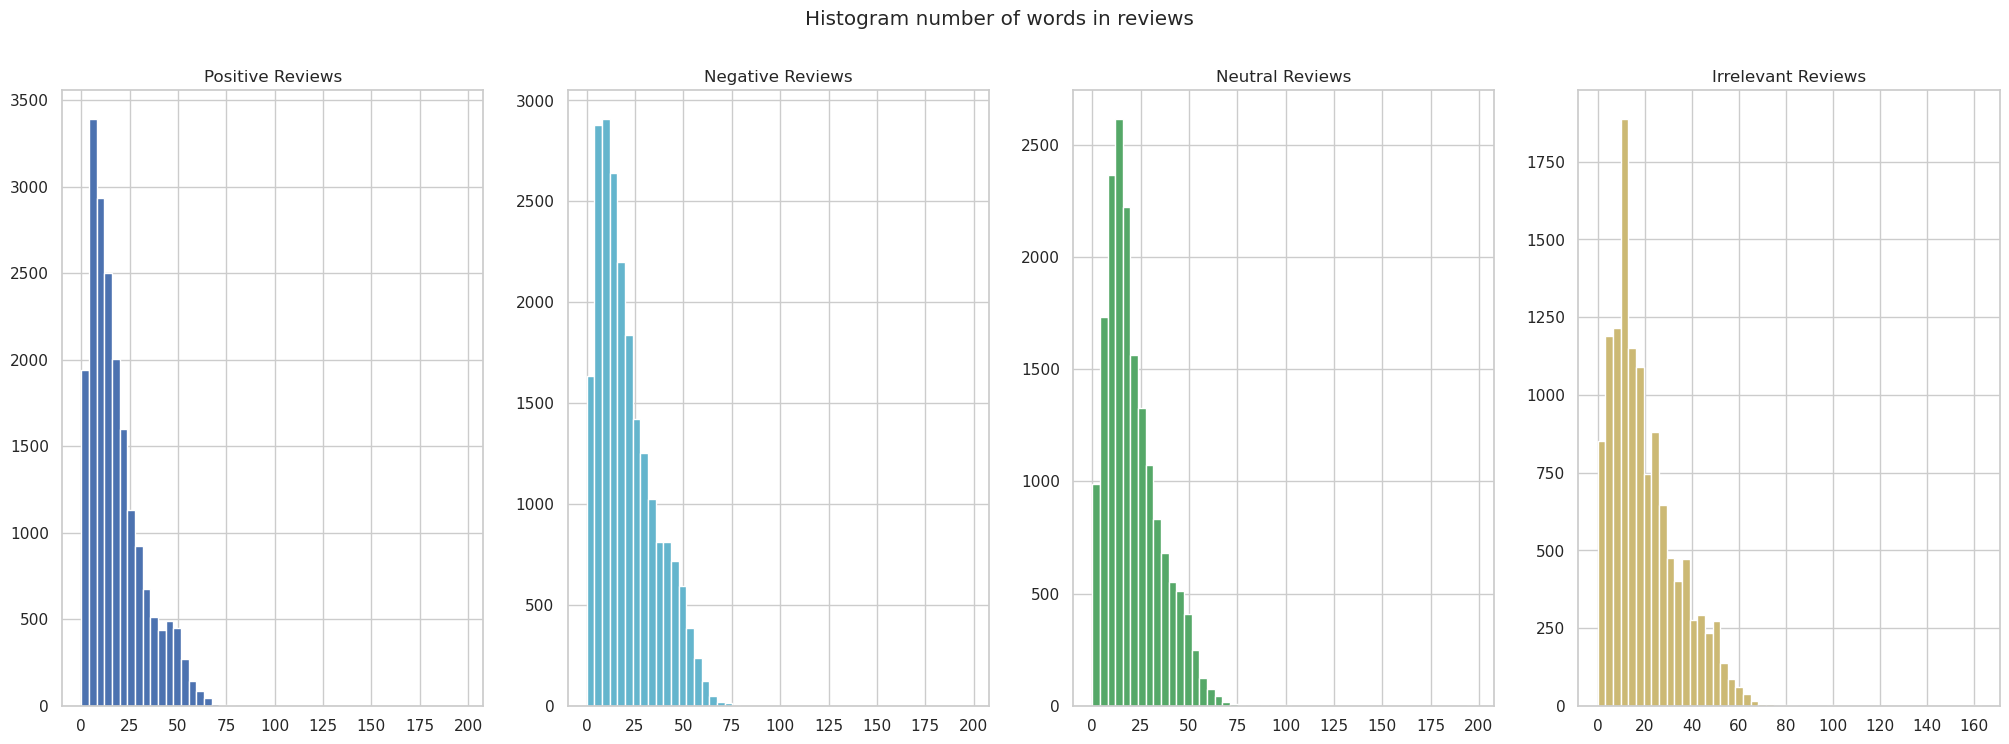

In [27]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,8))

ax1.hist(train[train['Sentiment'] == 'Positive']['Tweet Content'].str.split().map(lambda x: len(x)), bins=50, color='b')
ax1.set_title('Positive Reviews')

ax2.hist(train[train['Sentiment'] == 'Negative']['Tweet Content'].str.split().map(lambda x: len(x)), bins=50, color='c')
ax2.set_title('Negative Reviews')

ax3.hist(train[train['Sentiment'] == 'Neutral']['Tweet Content'].str.split().map(lambda x: len(x)), bins=50, color='g')
ax3.set_title('Neutral Reviews')

ax4.hist(train[train['Sentiment'] == 'Irrelevant']['Tweet Content'].str.split().map(lambda x: len(x)), bins=50, color='y')
ax4.set_title('Irrelevant Reviews')


f.suptitle('Histogram number of words in reviews')

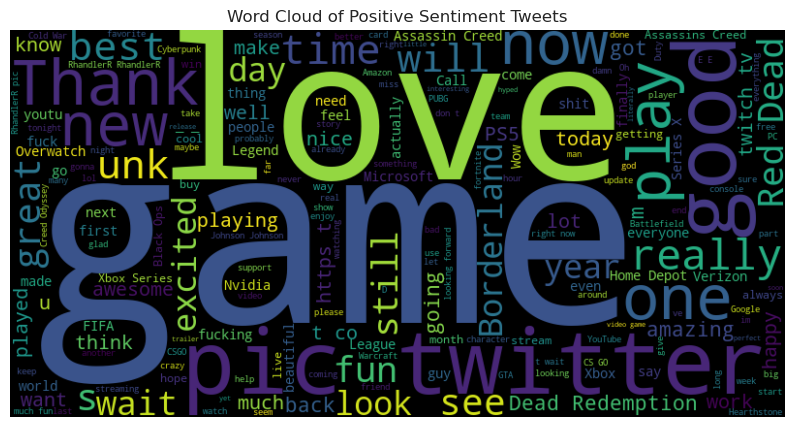

In [28]:
# Filter positive sentiment tweets and extract the 'Tweet Content' column
positive_tweets = train[train["Sentiment"] == "Positive"]["Tweet Content"]

# Join all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Tweets')
plt.show()


In [29]:
from wordcloud import STOPWORDS
from collections import Counter

# Split the positive text into individual words
words = positive_text.split()

# Count the frequency of each word, excluding common words
word_freq = Counter(word for word in words if word not in STOPWORDS)

# Get the top 10 most frequent words
top_words = word_freq.most_common(20)

top_words

[('I', 7817),
 ('.', 2394),
 ('/', 2363),
 ('@', 2336),
 ('game', 1562),
 ('The', 1392),
 ('love', 1291),
 ('really', 1113),
 ("I'm", 1088),
 ('good', 1071),
 ('-', 935),
 ('new', 927),
 ('2', 900),
 ('This', 880),
 ('play', 851),
 ('will', 829),
 ('best', 815),
 ('playing', 778),
 ('one', 740),
 ('3', 692)]

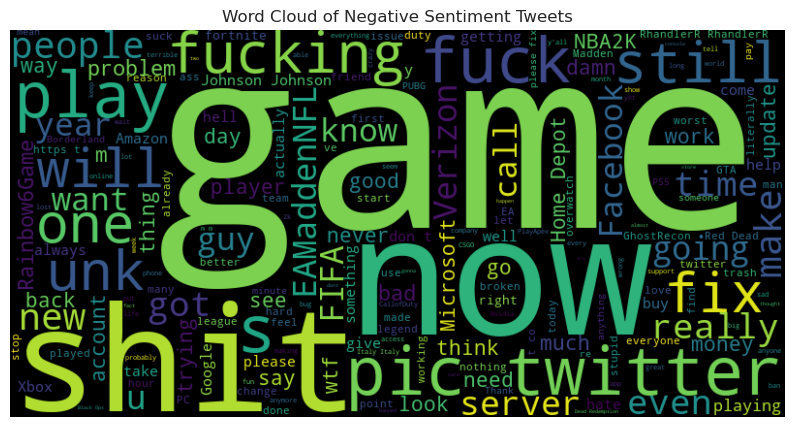

In [30]:
# Filter positive sentiment tweets and extract the 'Tweet Content' column
negative_tweets = train[train["Sentiment"] == "Negative"]["Tweet Content"]

# Join all the positive tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Tweets')
plt.show()


In [31]:
# Split the positive text into individual words
words = negative_text.split()

# Count the frequency of each word, excluding common words
word_freq = Counter(word for word in words if word not in STOPWORDS)

# Get the top 10 most frequent words
top_words = word_freq.most_common(20)

top_words

[('I', 8533),
 ('@', 4619),
 ('game', 2777),
 ('/', 2246),
 ('.', 1527),
 ('The', 1083),
 ('shit', 1052),
 ('fix', 1030),
 ('play', 997),
 ('still', 953),
 ('’', 943),
 ('now', 940),
 ('fucking', 866),
 ('will', 866),
 ('really', 865),
 ('even', 861),
 ('This', 837),
 ('&', 834),
 ('got', 787),
 ('one', 784)]

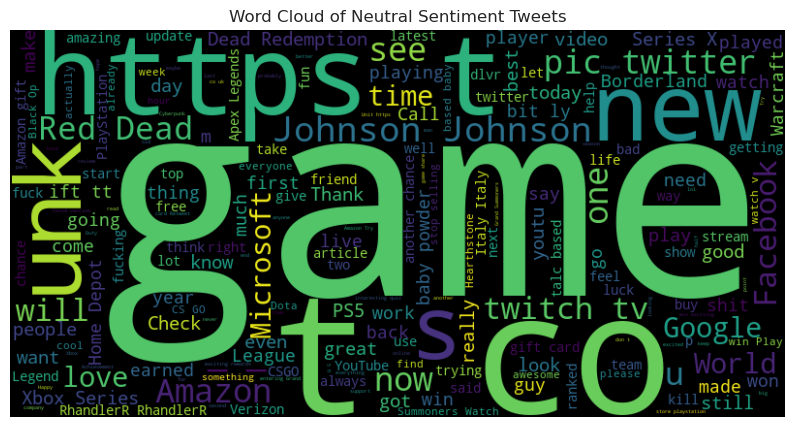

In [32]:
# Filter positive sentiment tweets and extract the 'Tweet Content' column
neutral_tweets = train[train["Sentiment"] == "Neutral"]["Tweet Content"]

# Join all the positive tweets into a single string
neutral_text = ' '.join(neutral_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Sentiment Tweets')
plt.show()


In [33]:
# Split the positive text into individual words
words = neutral_text.split()

# Count the frequency of each word, excluding common words
word_freq = Counter(word for word in words if word not in STOPWORDS)

# Get the top 10 most frequent words
top_words = word_freq.most_common(20)

top_words

[('/', 7444),
 ('I', 4647),
 ('.', 3501),
 ('@', 2354),
 ('-', 2291),
 ('Johnson', 1630),
 ('The', 1590),
 ('&', 1363),
 ('_', 1050),
 ('2', 955),
 ('Amazon', 804),
 ('game', 768),
 ('will', 719),
 ('now', 615),
 ('A', 587),
 ('…', 587),
 ('Facebook', 565),
 ("I'm", 556),
 ('see', 539),
 ('Microsoft', 537)]

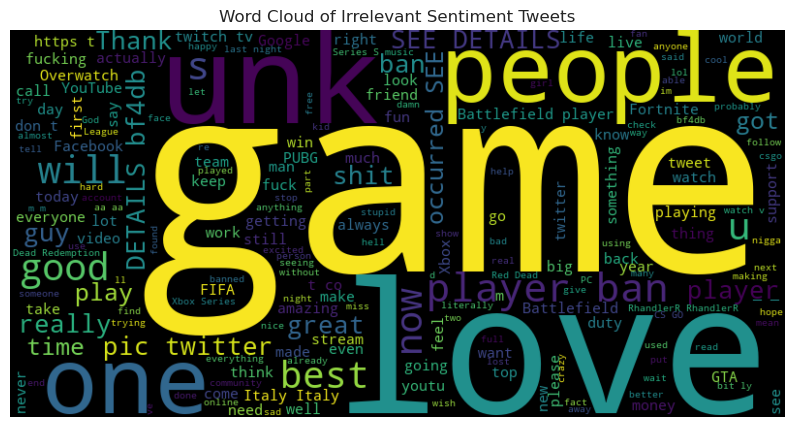

In [34]:
# Filter positive sentiment tweets and extract the 'Tweet Content' column
Irrelevant_tweets = train[train["Sentiment"] == "Irrelevant"]["Tweet Content"]

# Join all the positive tweets into a single string
Irrelevant_text = ' '.join(Irrelevant_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(Irrelevant_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Irrelevant Sentiment Tweets')
plt.show()


In [35]:
# Split the positive text into individual words
words = Irrelevant_text.split()

# Count the frequency of each word, excluding common words
word_freq = Counter(word for word in words if word not in STOPWORDS)

# Get the top 10 most frequent words
top_words = word_freq.most_common(20)

top_words


[('I', 3691),
 ('/', 2537),
 ('.', 2238),
 ('@', 1667),
 ('The', 878),
 ('player', 786),
 ('A', 674),
 ('ban', 674),
 ('-', 659),
 ('people', 599),
 ('_', 588),
 ('4', 557),
 ('This', 544),
 ('will', 540),
 ('game', 519),
 ('one', 510),
 ('love', 505),
 ("I'm", 489),
 ('see', 487),
 ('Battlefield', 478)]

## MODELLING

In [36]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split

In [37]:
data = train[['Tweet Content', 'Sentiment']]

# Set your model output as categorical and save in new label col
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])

# Transform your output to numeric
data['Sentiment'] = data['Sentiment_label'].cat.codes

data_train, data_test = train_test_split(data, test_size = 0.1)

data_train.head(10)

,Tweet Content,Sentiment,Sentiment_label
63834,@EAMaddenNFL has one bad game in the last 5 years. @EASPORTSNHL hasn’t had a good game in over 5 years.,1,Negative
2586,"""This is gonna be my year""",3,Positive
27838,and Memphis - Canals ( and failed urban parking.... ),2,Neutral
7677,Time for some more boops and kills in RhandlerR on RhandlerR. Lets get that new Torb skin . . . . twitch.tv/nakubael RhttpR],3,Positive
6892,"If not you were trying to find cloth face masks ( or not medical science grade ), Etsy TV is awesome. » No, obviously this isn't an advertisement. These folks are going far and wide beyond in thei...",1,Negative
38443,Tonight in Discord you stream bad recordings:... My friend from home argues that Monster Train has the same exact aesthetic as Hearthstone and is therefore nothing spectacular and deserves criticism.,1,Negative
61600,Just started over getting thrown back into GTA online and my lucky god does Rockstar have an incredible taste in music... now I'm going to need to play these games again someday and maybe keep tha...,3,Positive
38846,.. Playing.. Hetch.tv / MorningStarGG.. Get... @ MeanGorillaGC,2,Neutral
15453,@dota2updates dota matchmaking suck so bad... unsure why so long for big brainers to sort of. Belly's not big..... not enough brain power.,1,Negative
20509,awww yes baby,3,Positive


In [38]:
data_test.head()

,Tweet Content,Sentiment,Sentiment_label
17059,xbox. definitely a ps5 fuck xbox fuck u microsoft fix ur shit console server. i pay $20 per month to be able to play maybe 2 weeks continuously. fuck damn consoles. subscription should be $1 per m...,3,Positive
55559,I still open u @CallofDuty,1,Negative
36981,Microsoft-Owned Minecraft Will Stop Following Amazon’s Cloud Services.com/2020/07/20/mic…,2,Neutral
3410,Mistakes.,0,Irrelevant
66558,Awful,1,Negative


# Bert

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# Load and preprocess the data
data = train[['Tweet Content', 'Sentiment']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes

# Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.1)

# Extract the training and testing texts and labels
train_texts = data_train['Tweet Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
test_texts = data_test['Tweet Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Convert the labels to one-hot encoding
num_labels = len(data['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

# Define the model architecture
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
output = model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :])  # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']



# Use smaller batch size
batch_size = 16



model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_dataset.batch(batch_size), epochs=2)

# Evaluate the model
model.evaluate(test_dataset.batch(batch_size))



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/2
3992/3992 [==============================] - 1103s 264ms/step - loss: 0.8398 - accuracy: 0.6626
Epoch 2/2
444/444 [==============================] - 47s 99ms/step - loss: 0.2902 - accuracy: 0.8944


[0.29021772742271423, 0.8944475650787354]

111/111 [==============================] - 33s 299ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.96      0.96      0.96     11142
    Negative       0.98      0.96      0.97     19456
     Neutral       0.97      0.94      0.96     15643
    Positive       0.93      0.98      0.96     17621

    accuracy                           0.96     63862
   macro avg       0.96      0.96      0.96     63862
weighted avg       0.96      0.96      0.96     63862



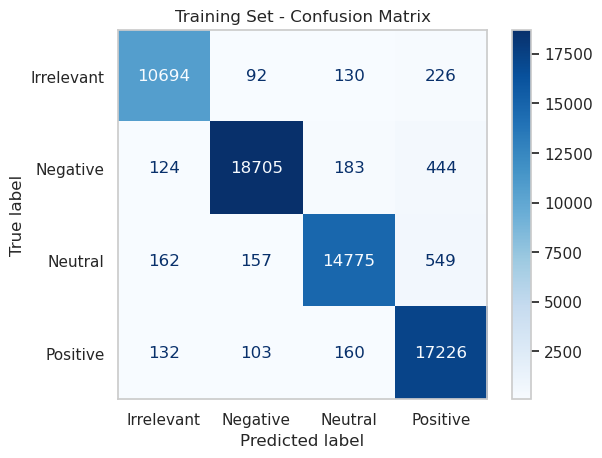

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.89      0.88      0.89      1304
    Negative       0.92      0.91      0.91      2109
     Neutral       0.92      0.85      0.88      1755
    Positive       0.86      0.93      0.89      1928

    accuracy                           0.89      7096
   macro avg       0.90      0.89      0.89      7096
weighted avg       0.90      0.89      0.89      7096



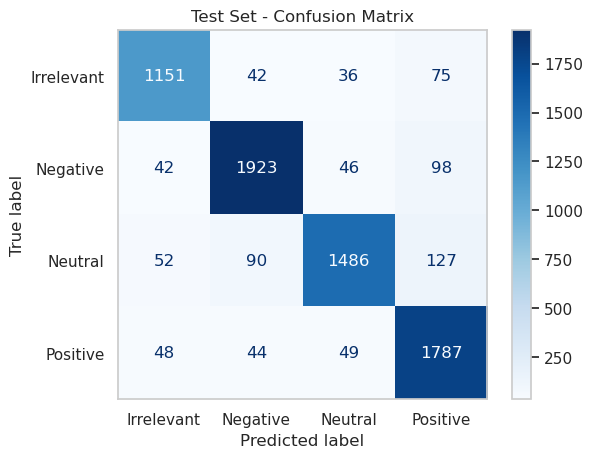

In [43]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Make predictions on the training and test datasets
train_predictions = model.predict(train_dataset.batch(64))
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
train_predicted_sentiments = data['Sentiment_label'].cat.categories[train_predicted_labels]
test_predicted_sentiments = data['Sentiment_label'].cat.categories[test_predicted_labels]

# Convert the true labels to their original sentiment categories
train_true_labels = data_train['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

# Calculate the classification report for the training set
train_classification_rep = classification_report(train_true_labels, train_predicted_sentiments)
print("Training Set - Classification Report:\n", train_classification_rep)

# Generate the confusion matrix for the training set
train_confusion_mat = confusion_matrix(train_true_labels, train_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(train_true_labels)

# Plot the confusion matrix for the training set
train_display = ConfusionMatrixDisplay(confusion_matrix=train_confusion_mat, display_labels=labels)
train_display.plot(cmap='Blues') 
plt.title("Training Set - Confusion Matrix")
plt.grid(False)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Generate the confusion matrix for the test set
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()



16/16 [==============================] - 8s 292ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.97      0.90      0.93       172
    Negative       0.97      0.97      0.97       266
     Neutral       0.96      0.91      0.93       285
    Positive       0.90      0.99      0.94       277

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.94      0.94      1000



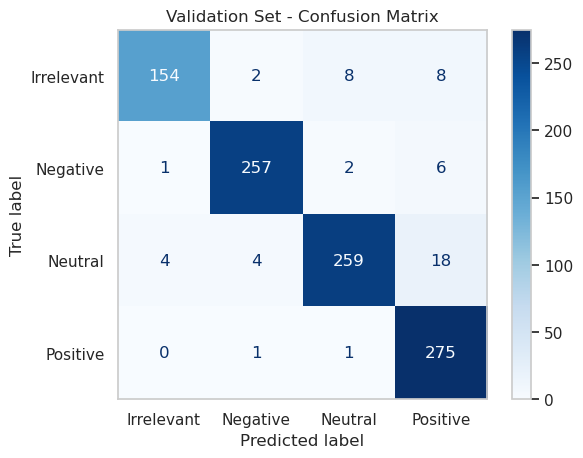

In [46]:
# Load and preprocess the data
data_val = validation[['Tweet Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes





# Extract the training and testing texts and labels
val_texts = data_val['Tweet Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Convert the labels to one-hot encoding
num_labels = len(data_val['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))

# Make predictions on the training and test datasets

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data_val['Sentiment_label'].cat.categories[val_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']

# Calculate the classification report for the training set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Training Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the training set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the training set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues') 
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()




# Roberta

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFRobertaModel, RobertaTokenizer

#Load the tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaModel.from_pretrained('roberta-base')

#Load and preprocess the data
data = train[['Tweet Content', 'Sentiment']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes

#Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.1)

#Extract the training and testing texts and labels
train_texts = data_train['Tweet Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
test_texts = data_test['Tweet Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

#Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

#Convert the labels to one-hot encoding
num_labels = len(data['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

#Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

#Define the model architecture
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
output = model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :]) # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

#Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

#Use smaller batch size
batch_size = 16

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_dataset.batch(batch_size), epochs=2)

#Evaluate the model
model.evaluate(test_dataset.batch(batch_size))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Epoch 1/2
3992/3992 [==============================] - 1130s 271ms/step - loss: 0.8783 - accuracy: 0.6467
Epoch 2/2
444/444 [==============================] - 47s 98ms/step - loss: 0.4032 - accuracy: 0.8599


[0.40320244431495667, 0.8599210977554321]

111/111 [==============================] - 33s 299ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.94      0.88      0.91     11230
    Negative       0.96      0.94      0.95     19396
     Neutral       0.94      0.91      0.92     15615
    Positive       0.88      0.96      0.92     17621

    accuracy                           0.93     63862
   macro avg       0.93      0.92      0.93     63862
weighted avg       0.93      0.93      0.93     63862



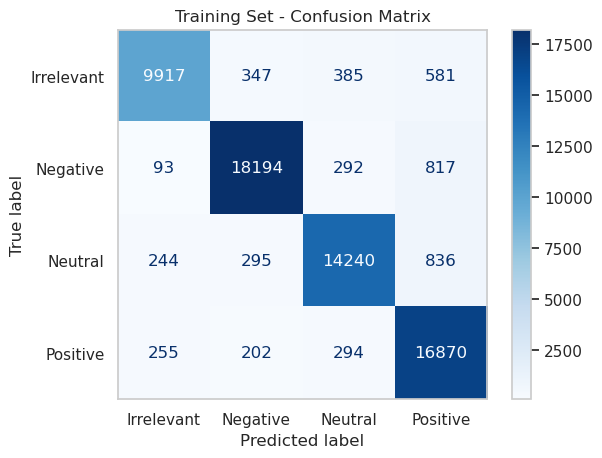

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.86      0.77      0.81      1216
    Negative       0.89      0.89      0.89      2169
     Neutral       0.87      0.85      0.86      1783
    Positive       0.82      0.89      0.85      1928

    accuracy                           0.86      7096
   macro avg       0.86      0.85      0.85      7096
weighted avg       0.86      0.86      0.86      7096



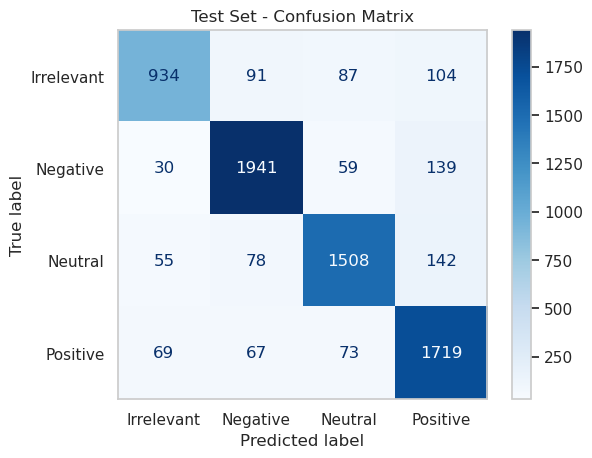

In [41]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Make predictions on the training and test datasets
train_predictions = model.predict(train_dataset.batch(64))
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
train_predicted_sentiments = data['Sentiment_label'].cat.categories[train_predicted_labels]
test_predicted_sentiments = data['Sentiment_label'].cat.categories[test_predicted_labels]

# Convert the true labels to their original sentiment categories
train_true_labels = data_train['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

# Calculate the classification report for the training set
train_classification_rep = classification_report(train_true_labels, train_predicted_sentiments)
print("Training Set - Classification Report:\n", train_classification_rep)

# Generate the confusion matrix for the training set
train_confusion_mat = confusion_matrix(train_true_labels, train_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(train_true_labels)

# Plot the confusion matrix for the training set
train_display = ConfusionMatrixDisplay(confusion_matrix=train_confusion_mat, display_labels=labels)
train_display.plot(cmap='Blues') 
plt.title("Training Set - Confusion Matrix")
plt.grid(False)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Generate the confusion matrix for the test set
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()



16/16 [==============================] - 5s 295ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.91      0.92       172
    Negative       0.97      0.95      0.96       266
     Neutral       0.95      0.88      0.91       285
    Positive       0.90      0.98      0.94       277

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



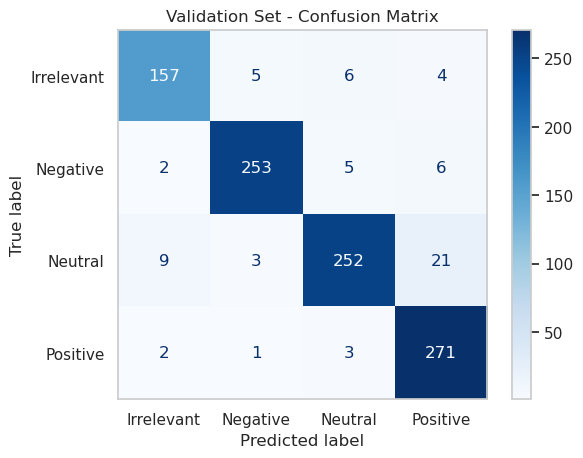

In [42]:
# Load and preprocess the data
data_val = validation[['Tweet Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes





# Extract the training and testing texts and labels
val_texts = data_val['Tweet Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Convert the labels to one-hot encoding
num_labels = len(data_val['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))

# Make predictions on the training and test datasets

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data_val['Sentiment_label'].cat.categories[val_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']

# Calculate the classification report for the training set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Training Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the training set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the training set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues') 
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()




# DistilBERT

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFDistilBertModel, DistilBertTokenizer

#Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

#Load and preprocess the data
data = train[['Tweet Content', 'Sentiment']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes

#Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.1)

#Extract the training and testing texts and labels
train_texts = data_train['Tweet Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
test_texts = data_test['Tweet Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

#Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

#Convert the labels to one-hot encoding
num_labels = len(data['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

#Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

#Define the model architecture
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
output = model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :]) # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

#Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

#Use smaller batch size
batch_size = 16

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_dataset.batch(batch_size), epochs=2)

#Evaluate the model
model.evaluate(test_dataset.batch(batch_size))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Epoch 1/2
3992/3992 [==============================] - 605s 145ms/step - loss: 0.8656 - accuracy: 0.6489
Epoch 2/2
444/444 [==============================] - 26s 54ms/step - loss: 0.3498 - accuracy: 0.8770


[0.34980833530426025, 0.8769729137420654]

111/111 [==============================] - 17s 152ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.98      0.91      0.95     11250
    Negative       0.97      0.95      0.96     19366
     Neutral       0.94      0.95      0.95     15643
    Positive       0.92      0.97      0.95     17603

    accuracy                           0.95     63862
   macro avg       0.95      0.95      0.95     63862
weighted avg       0.95      0.95      0.95     63862



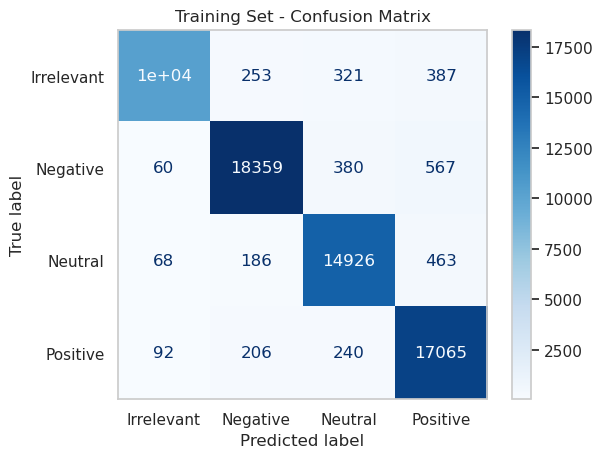

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.91      0.79      0.84      1196
    Negative       0.92      0.89      0.90      2199
     Neutral       0.84      0.89      0.87      1755
    Positive       0.84      0.91      0.87      1946

    accuracy                           0.88      7096
   macro avg       0.88      0.87      0.87      7096
weighted avg       0.88      0.88      0.88      7096



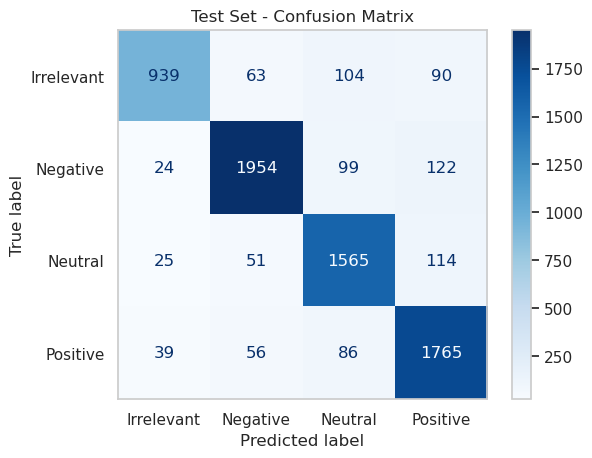

In [40]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Make predictions on the training and test datasets
train_predictions = model.predict(train_dataset.batch(64))
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
train_predicted_sentiments = data['Sentiment_label'].cat.categories[train_predicted_labels]
test_predicted_sentiments = data['Sentiment_label'].cat.categories[test_predicted_labels]

# Convert the true labels to their original sentiment categories
train_true_labels = data_train['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

# Calculate the classification report for the training set
train_classification_rep = classification_report(train_true_labels, train_predicted_sentiments)
print("Training Set - Classification Report:\n", train_classification_rep)

# Generate the confusion matrix for the training set
train_confusion_mat = confusion_matrix(train_true_labels, train_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(train_true_labels)

# Plot the confusion matrix for the training set
train_display = ConfusionMatrixDisplay(confusion_matrix=train_confusion_mat, display_labels=labels)
train_display.plot(cmap='Blues') 
plt.title("Training Set - Confusion Matrix")
plt.grid(False)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Generate the confusion matrix for the test set
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()



16/16 [==============================] - 4s 149ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.94      0.91      0.92       172
    Negative       0.98      0.92      0.95       266
     Neutral       0.91      0.94      0.93       285
    Positive       0.91      0.96      0.94       277

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.94      0.94      0.94      1000



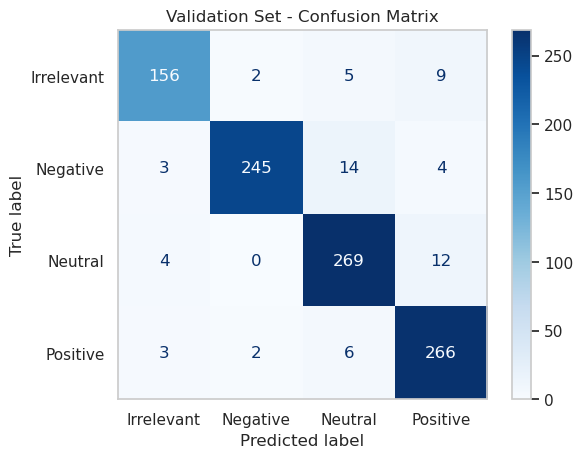

In [41]:
# Load and preprocess the data
data_val = validation[['Tweet Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes





# Extract the training and testing texts and labels
val_texts = data_val['Tweet Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Convert the labels to one-hot encoding
num_labels = len(data_val['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))

# Make predictions on the training and test datasets

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data_val['Sentiment_label'].cat.categories[val_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']

# Calculate the classification report for the training set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Training Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the training set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the training set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues') 
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()




# XLNet

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFXLNetModel, XLNetTokenizer

# Load the tokenizer and model
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = TFXLNetModel.from_pretrained('xlnet-base-cased')

# Load and preprocess the data
data = train[['Tweet Content', 'Sentiment']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes

# Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.1)

# Extract the training and testing texts and labels
train_texts = data_train['Tweet Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
test_texts = data_test['Tweet Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Convert the labels to one-hot encoding
num_labels = len(data['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

# Define the model architecture
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
output = model(input_ids=input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :])  # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

# Use smaller batch size
batch_size = 16

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_dataset.batch(batch_size), epochs=2)

# Evaluate the model
model.evaluate(test_dataset.batch(batch_size))

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Epoch 1/2
3992/3992 [==============================] - 1346s 326ms/step - loss: 1.0732 - accuracy: 0.5663
Epoch 2/2
444/444 [==============================] - 53s 114ms/step - loss: 0.4967 - accuracy: 0.8096


[0.4967234432697296, 0.8096110224723816]

111/111 [==============================] - 42s 377ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.79      0.85     11195
    Negative       0.93      0.91      0.92     19354
     Neutral       0.88      0.85      0.86     15705
    Positive       0.82      0.93      0.87     17608

    accuracy                           0.88     63862
   macro avg       0.89      0.87      0.88     63862
weighted avg       0.88      0.88      0.88     63862



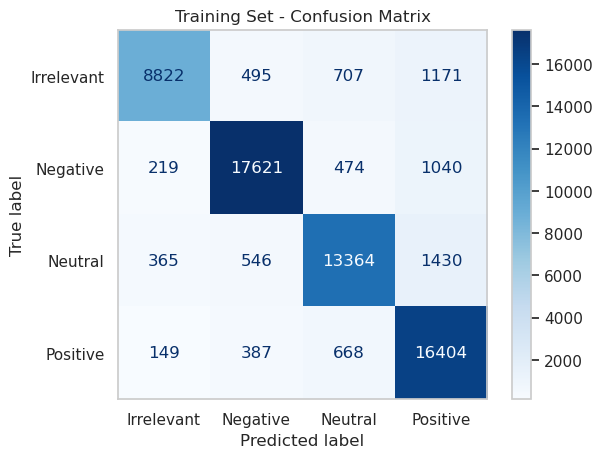

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.85      0.66      0.74      1251
    Negative       0.88      0.86      0.87      2211
     Neutral       0.78      0.77      0.78      1693
    Positive       0.75      0.88      0.81      1941

    accuracy                           0.81      7096
   macro avg       0.81      0.79      0.80      7096
weighted avg       0.81      0.81      0.81      7096



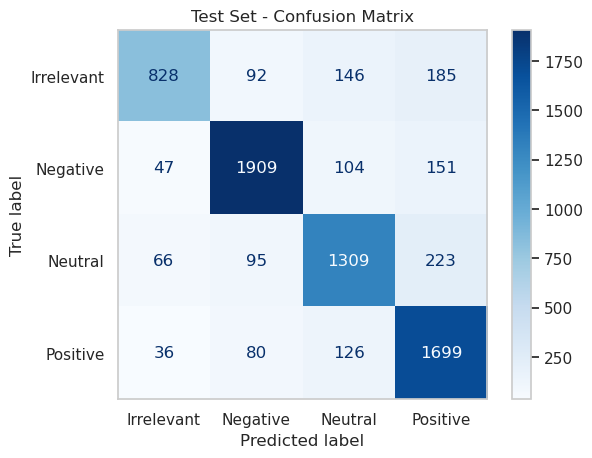

In [43]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Make predictions on the training and test datasets
train_predictions = model.predict(train_dataset.batch(64))
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
train_predicted_sentiments = data['Sentiment_label'].cat.categories[train_predicted_labels]
test_predicted_sentiments = data['Sentiment_label'].cat.categories[test_predicted_labels]

# Convert the true labels to their original sentiment categories
train_true_labels = data_train['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

# Calculate the classification report for the training set
train_classification_rep = classification_report(train_true_labels, train_predicted_sentiments)
print("Training Set - Classification Report:\n", train_classification_rep)

# Generate the confusion matrix for the training set
train_confusion_mat = confusion_matrix(train_true_labels, train_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(train_true_labels)

# Plot the confusion matrix for the training set
train_display = ConfusionMatrixDisplay(confusion_matrix=train_confusion_mat, display_labels=labels)
train_display.plot(cmap='Blues') 
plt.title("Training Set - Confusion Matrix")
plt.grid(False)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Generate the confusion matrix for the test set
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()



16/16 [==============================] - 6s 370ms/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.95      0.81      0.87       172
    Negative       0.94      0.92      0.93       266
     Neutral       0.89      0.83      0.86       285
    Positive       0.81      0.95      0.87       277

    accuracy                           0.89      1000
   macro avg       0.90      0.88      0.88      1000
weighted avg       0.89      0.89      0.88      1000



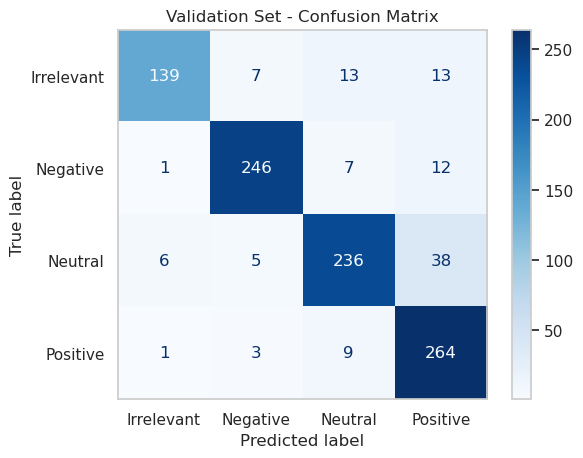

In [44]:
# Load and preprocess the data
data_val = validation[['Tweet Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes





# Extract the training and testing texts and labels
val_texts = data_val['Tweet Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Convert the labels to one-hot encoding
num_labels = len(data_val['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))

# Make predictions on the training and test datasets

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data_val['Sentiment_label'].cat.categories[val_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']

# Calculate the classification report for the training set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Training Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the training set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the training set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues') 
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()


